<a href="https://colab.research.google.com/github/imamfaisal21/DataScientist/blob/main/B62_Classfication_Canceripynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Kolom yang akan dihapus adalah id dan Unnamed: 32

Kolom Diagnosis adalah kolom data target

sisa kolom lainnya adalah data features

# Exploratory Data Analysis

Tahapan kita memahami data kita dengan visualisasi untuk mendapatkan insight dari data

In [ ]:
import numpy as np # Numerical Processing in Pyhton
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import plotly.express as px # Data Visualization

In [ ]:
df.shape # 569 baris dan 33 kolom pada dataset kita

(569, 33)

In [ ]:
print("The dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The dataset has 569 rows and 33 columns


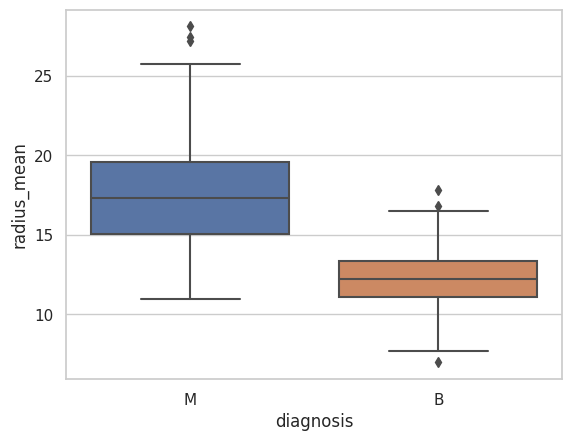

In [ ]:
sns.set_theme(style="whitegrid") # Menambahkan garis pada diagram

ax = sns.boxplot(x =df["diagnosis"],
                 y =df["radius_mean"])

#outlier => data yang tidak wajar

In [ ]:
fig = px.box(df,
             x ="diagnosis",
             y = "radius_mean",
             color = "diagnosis",
             points ="all")

fig.show()

<Axes: xlabel='radius_mean', ylabel='perimeter_mean'>

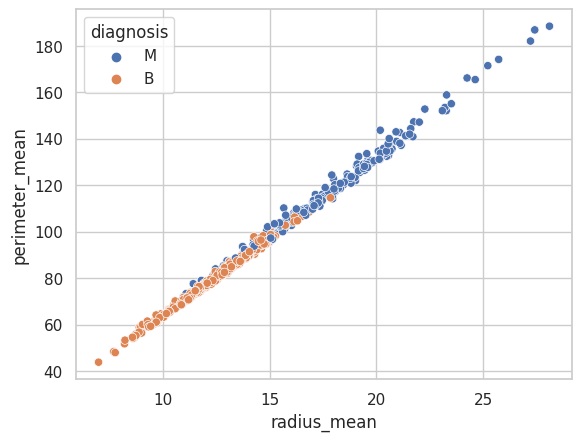

In [ ]:
# Scatter Plot => Numeric with Numeric

sns.scatterplot(data = df,
                x = "radius_mean",
                y = "perimeter_mean",
                hue = "diagnosis") #Hue untuk mewarnai seaborn


# korelasi
# korelasi positif comtohnya  (luas tanah dengan harga tanah)
# korelasi negatif contohnya (permintaan dengan penawaran)
# Tanpa korelasi  contohnya (kecepatan maks mobil dengan jumlah joks mobil)

In [ ]:
# Scatterplot in plotly

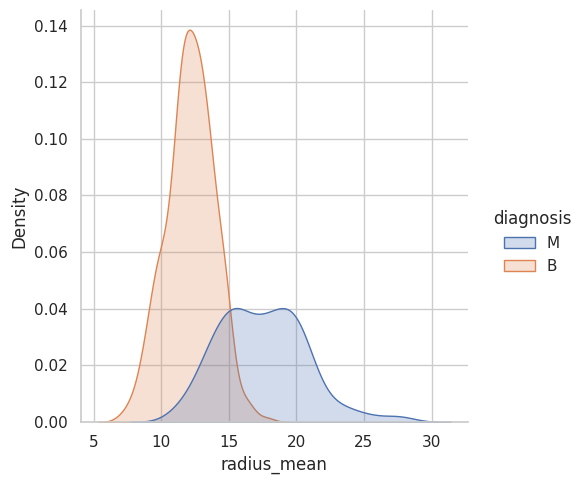

In [ ]:
#Density Plot _> Univariate (satu axis), menunjukkan kepadatan data didalam jangkauan

sns.displot(data = df,
           x = "radius_mean",
            kind = "kde",
            hue = "diagnosis",
            fill = True)

In [ ]:
# Density plot in Plotly

In [ ]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
round(df["diagnosis"].value_counts() / len(df) * 100, 2)

B    62.74
M    37.26
Name: diagnosis, dtype: float64

<Axes: xlabel='diagnosis', ylabel='Count'>

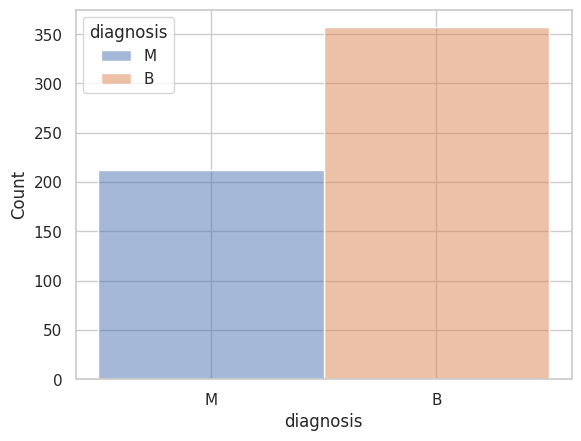

In [ ]:
#Histogram --> univariate
sns.histplot(data = df,
             x = "diagnosis",
             hue = "diagnosis")

In [ ]:
import scipy.stats # Statistik

In [ ]:
df.corr()

<ipython-input-94-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


In [ ]:
# Multivariate
 df_num = df.iloc[:, 1:11]
df_num.head()

sns.pairplot(df_num, hue = "diagnosis")

# Data Preprocessing

Menentukan data yang ajan digunakan untuk training model dan proses membersihkan data

In [ ]:
# Pisahkan data features dengan data target

# Data Target
y= df["diagnosis"]

# Data Features -> Hapus ID kolom ID, Unnamed; 32, dihapus
x = df.drop(["id", "diagnosis"], axis = 1) # axis = 1 artinya kita buang sebagai kolom

x = x.iloc[:, :-1] # Ambil semua baris data dan semua kolom kecuali kolom terakhir (Unnames: 32)

Modeling

In [ ]:
#Library untuk algoritma classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split # Membagi porsi data training dan testing

In [ ]:
#Anggap machien adalah siswa yang akan ujian, sebelum ujian kita berikan soal untuk latihan
# Soal latihan untuk siswa -- x_train
# Soal latihan untuk siswa -- x_test

# Jawaban latihan untuk siswa -- y_train
# Jawaban ujian soal -- y_test
# Jawaban siswa saat ujian -- y_pred

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2023)
# Random_state = untuk setting pengacakan data pemilihan angka bebas

In [ ]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

Logistic Regression (Binary Classification)

In [ ]:
model_lg = LogisticRegression() # Create a logistic regression object, OOP

# Training model dengan data train
model_lg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred = model_lg.predict(x_test)
y_pred

array(['M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M'], dtype=object)

Dicison Tree

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

y_pred_dt = model_dt.predict(x_test)

In [ ]:
y_pred_dt

array(['M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M'], dtype=object)

Random Forest

In [ ]:
model_rf = RandomForestClassifier()

model_rf.fit(x_train, y_train)

y_pred_rf = model_rf.predict(x_test)

In [ ]:
y_pred_rf

array(['M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M'], dtype=object)

SVM

In [ ]:
model_svm = SVC()

In [ ]:
model_svc = RandomForestClassifier()

model_svc.fit(x_train, y_train)

y_pred_svc = model_svc.predict(x_test)

In [ ]:
y_pred_svc

array(['M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M'], dtype=object)

In [ ]:
 # Precision untuk mendeteksi spam atau masih ragu
 # Recall untuk ke akuratan

Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Logistic Regression

confusion_matrix_lg = confusion_matrix(y_test, y_pred)
print(confusion_matrix_lg)

[[70  1]
 [ 2 41]]


In [ ]:
print(classification_report(y_test, y_pred_rf)) #Random Forest

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Bagian Baru

In [ ]:
print(classification_report(y_test, y_pred_svc)) #SVM

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
import joblib

joblib.dump(model_lg, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']